In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train_dataframes.csv')
df = df[["datetime","hourOfDay","DEMAND"]].head(24*7)
# df.set_index('datetime',inplace=True)
df.head()

,datetime,hourOfDay,DEMAND
0,2015-01-31 01:00:00,1,954.2018
1,2015-01-31 02:00:00,2,913.8660
2,2015-01-31 03:00:00,3,903.3637
3,2015-01-31 04:00:00,4,889.0806
4,2015-01-31 05:00:00,5,910.1472


In [ ]:
df.describe()

,hourOfDay,DEMAND
count,168.000000,168.000000
mean,11.500000,1123.338901
std,6.942881,190.063397
min,0.000000,822.266000
25%,5.750000,943.305000
50%,11.500000,1091.083850
75%,17.250000,1250.724825
max,23.000000,1495.018000


<Axes: >

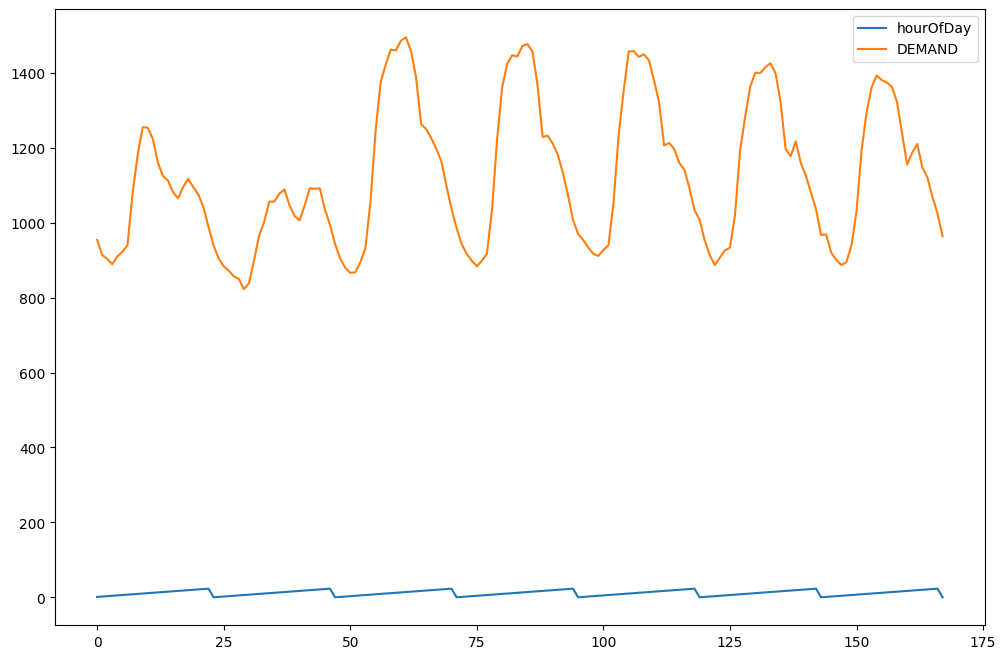

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['DEMAND'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['DEMAND'])

ADF Test Statistic : -2.920161304414046
p-value : 0.04305324312580294
#Lags Used : 14
Number of Observations Used : 153
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['DEMAND'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1705.985, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2242.873, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1855.063, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2843.562, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1739.222, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1708.913, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1709.850, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1707.366, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1760.044, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1723.060, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1710.912, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1710.483, Time=0.64 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1736.887, Time=0.11 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] i

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
model=ARIMA(df['DEMAND'],order=(2,0,2))
model_fit=model.fit()

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 DEMAND   No. Observations:                  168
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -846.995
Date:                Mon, 03 Jun 2024   AIC                           1705.989
Time:                        06:59:59   BIC                           1724.733
Sample:                             0   HQIC                          1713.596
                                - 168                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1123.3261     29.316     38.318      0.000    1065.868    1180.784
ar.L1          1.8153      0.067     27.230      0.000       1.685       1.946
ar.L2         -0.8862      0.058    -15.275      0.000      -1.000      -0.772
ma.L1         -0.1679      0.110     -1.521      0.128      -0.384       0.049
ma.L2         -0.2612      0.112     -2.339      0.019      -0.480      -0.042
sigma2      1366.5421    157.266      8.689      0.000    1058.306    1674.778
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                41.03
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             1.06
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

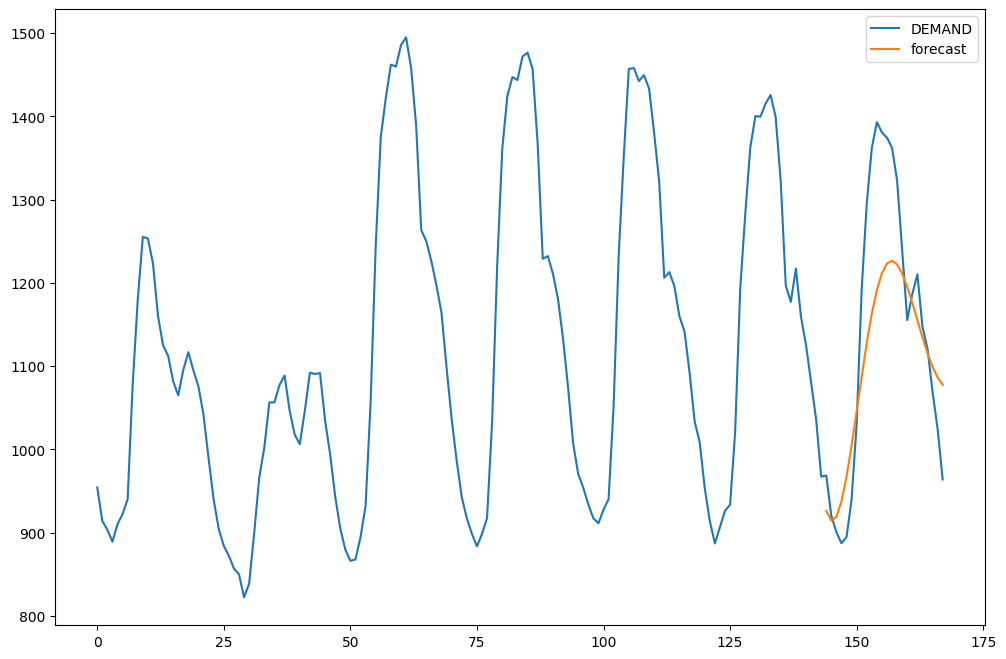

In [17]:
df['forecast']=model_fit.predict(start=24*6,end=24*7,dynamic=True)
df
df[['DEMAND','forecast']].plot(figsize=(12,8))

In [18]:
import statsmodels.api as sm

In [19]:
model=sm.tsa.statespace.SARIMAX(df['DEMAND'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

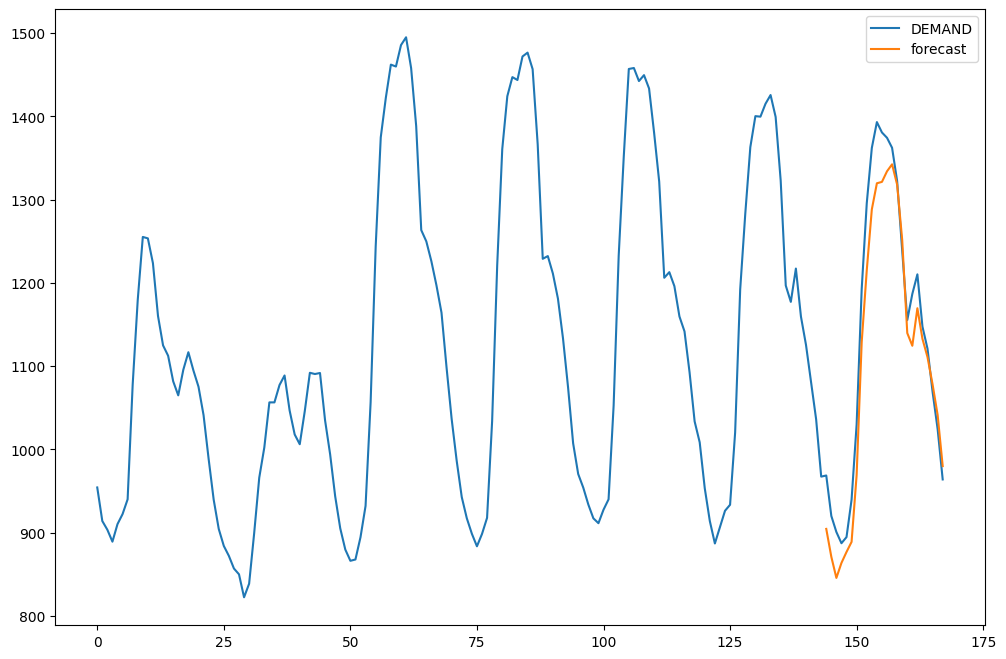

In [20]:
df['forecast']=results.predict(start=24*6,end=24*7,dynamic=True)
df[['DEMAND','forecast']].plot(figsize=(12,8))

In [21]:
df[24*6:]

,datetime,hourOfDay,DEMAND,forecast
144,2015-02-06 01:00:00,1,968.5689,904.422354
145,2015-02-06 02:00:00,2,919.9696,870.917798
146,2015-02-06 03:00:00,3,900.6830,845.523431
147,2015-02-06 04:00:00,4,887.1948,863.507257
148,2015-02-06 05:00:00,5,894.5465,876.680477
149,2015-02-06 06:00:00,6,939.4745,888.800698
150,2015-02-06 07:00:00,7,1029.9243,969.126574
151,2015-02-06 08:00:00,8,1192.5079,1128.858954
152,2015-02-06 09:00:00,9,1295.6597,1215.073351
153,2015-02-06 10:00:00,10,1362.0753,1288.228535


In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [23]:
mean_absolute_percentage_error(df[24*6:]['DEMAND'],df[24*6:]['forecast'])

3.44

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df[24*6:]['DEMAND'],df[24*6:]['forecast']))
rmse

45.88683494885942

In [25]:
100-3.44

96.56